Import Dependecies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Import Data

In [2]:
train = pd.read_csv(r'C:\Users\Admin\Downloads\train.csv')
test = pd.read_csv(r'C:\Users\Admin\Downloads\test.csv')

In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


Null Values

In [5]:
train.isnull().sum() * 100 /len(train)

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

Education and previous_year_rating have null values which is actually very low , so we can replace them with better values

In [6]:
category = train.select_dtypes(exclude = ['int' , 'float']).columns

In [7]:
numerical = train.select_dtypes(exclude = ['object']).columns

In [8]:
category

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [9]:
train['education'].fillna(train['education'].mode()[0] , inplace = True)

In [10]:
grp = train.groupby(by = list(category) , dropna = True)

In [11]:
train['previous_year_rating'] = grp['previous_year_rating'].transform(lambda x : x.fillna(x.median()))

In [12]:
train['previous_year_rating'].fillna(train['previous_year_rating'].median() , inplace = True)

In [13]:
train.isnull().sum() * 100 /len(train)

employee_id             0.0
department              0.0
region                  0.0
education               0.0
gender                  0.0
recruitment_channel     0.0
no_of_trainings         0.0
age                     0.0
previous_year_rating    0.0
length_of_service       0.0
KPIs_met >80%           0.0
awards_won?             0.0
avg_training_score      0.0
is_promoted             0.0
dtype: float64

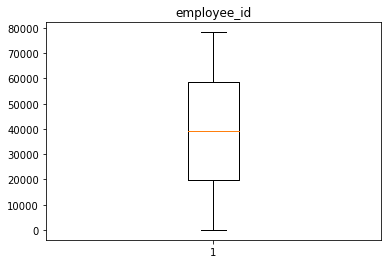

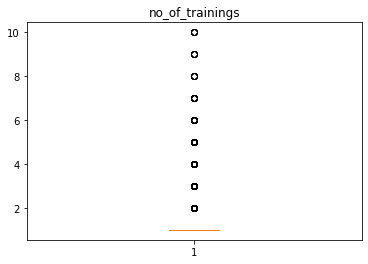

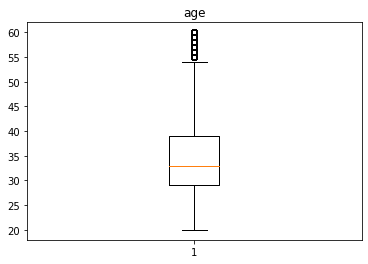

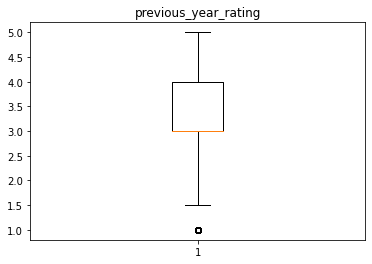

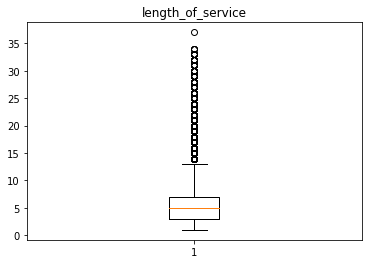

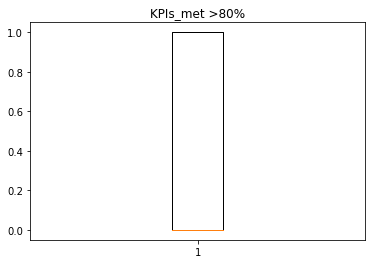

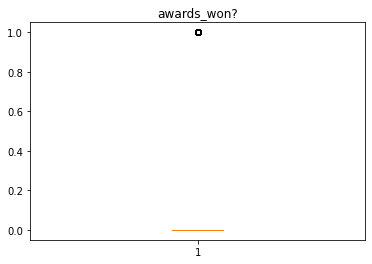

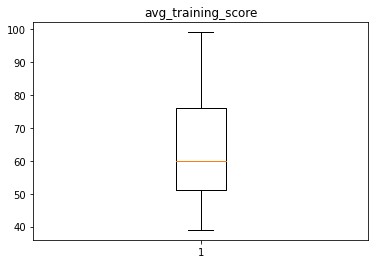

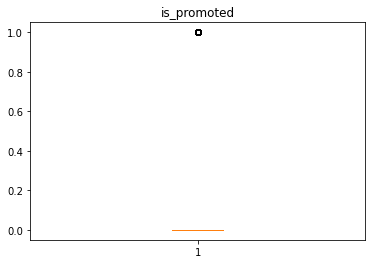

In [14]:
for i in numerical:
    plt.figure()
    plt.boxplot(train[i])
    plt.title(i)

In [15]:
def iqr(data , column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3- q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    return (lower , upper)

In [16]:
#for i in list(numerical)[1:-1]:
 #   lower , upper = iqr(train , i)
 #   train[i] = train[i][(train[i]<=upper) & (train[i]>=lower)]

In [17]:
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,0,45,0


In [18]:
#Get Dummies

In [19]:
dum  = pd.get_dummies(train[list(category)] , drop_first = False)

In [20]:
train = train.join(dum)

In [21]:
train.drop(list(category) , inplace = True , axis = 1)

In [22]:
train

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,35,5.0,8,1,0,49,0,0,...,0,0,0,0,1,1,0,0,0,1
1,65141,1,30,5.0,4,0,0,60,0,0,...,0,0,1,0,0,0,1,1,0,0
2,7513,1,34,3.0,7,0,0,50,0,0,...,0,0,1,0,0,0,1,0,0,1
3,2542,2,39,1.0,10,0,0,50,0,0,...,0,0,1,0,0,0,1,1,0,0
4,48945,1,45,3.0,2,0,0,73,0,0,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,1,48,3.0,17,0,0,78,0,0,...,0,0,1,0,0,0,1,0,0,1
54804,74592,1,37,2.0,6,0,0,56,0,0,...,0,0,0,0,1,1,0,1,0,0
54805,13918,1,27,5.0,3,1,0,79,0,1,...,0,0,1,0,0,0,1,1,0,0
54806,13614,1,29,1.0,2,0,0,45,0,0,...,0,1,1,0,0,0,1,0,0,1


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc = StandardScaler()

In [25]:
x = train.drop(['is_promoted'  , 'employee_id'] , axis = 1)
y = train['is_promoted']
x = sc.fit_transform(x)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
x = pd.DataFrame(x)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [30]:
lr = LogisticRegression()

In [31]:
lr.fit(x_train , y_train)

LogisticRegression()

In [32]:
y_pred = lr.predict(x_test)

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(y_test , y_pred)

array([[9988,   66],
       [ 672,  236]], dtype=int64)

In [35]:
(9991 + 235 )/len(x_test)

0.9328589673417259

In [36]:
lr.fit(x , y)

LogisticRegression()

In [37]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [38]:
test['education'] = test['education'].fillna(test['education'].mode()[0])

In [39]:
gr = test.groupby(by = list(category))

In [40]:
test['previous_year_rating'] = gr['previous_year_rating'].transform(lambda x : x.fillna(x.median()))

In [41]:
test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].median())

In [42]:
dum  = pd.get_dummies(test[list(category)] , drop_first = False)

In [43]:
test = test.join(dum)

In [44]:
test.drop(list(category) , inplace = True , axis = 1)

In [45]:
id = test['employee_id']

In [46]:
test.drop('employee_id' , inplace = True , axis = 1)

In [47]:
x = test

In [48]:
x_test  = sc.transform(x)

In [49]:
list(lr.predict(x_test)).count(0)

22844

In [50]:
list(lr.predict(x_test)).count(1)

646

In [51]:
list(y).count(0)

50140

In [52]:
list(y).count(1)

4668

In [53]:
y_pred = pd.DataFrame(lr.predict(x_test))

In [54]:
y_pred['employee_id'] = id

In [57]:
y_pred['is_promoted'] = y_pred[0]

In [58]:
y_pred.drop(0  , axis =1 , inplace = True)

In [60]:
y_pred.to_csv('Final_Result.csv')